In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Input, Concatenate, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, Sequence
from sklearn import metrics

# Augmentation

In [2]:
face_train_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.5, 0.6),
)

eyes_train_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.5, 0.6),
)

mouth_train_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.5, 0.6),
)

face_test_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.5, 0.6),
)

eyes_test_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.5, 0.6),
)

mouth_test_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.5, 0.6),
)

# Train & Test Generator

In [3]:
face_train_generator = face_train_gen.flow_from_directory(
    'data/train/face_train/',
    target_size=(38, 38),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

eyes_train_generator = eyes_train_gen.flow_from_directory(
    'data/train/eyes_train/',
    target_size=(30, 62),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

mouth_train_generator = mouth_train_gen.flow_from_directory(
    'data/train/mouth_train/',
    target_size=(30, 38),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

face_valid_generator = face_test_gen.flow_from_directory(
    'data/test/face_test/',
    target_size=(38, 38),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

eyes_valid_generator = eyes_test_gen.flow_from_directory(
    'data/test/eyes_test/',
    target_size=(30, 62),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

mouth_valid_generator = mouth_test_gen.flow_from_directory(
    'data/test/mouth_test/',
    target_size=(30, 38),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

Found 776 images belonging to 7 classes.
Found 777 images belonging to 7 classes.
Found 769 images belonging to 7 classes.
Found 181 images belonging to 7 classes.
Found 181 images belonging to 7 classes.
Found 181 images belonging to 7 classes.


# Build The Three Channel Convolutional Neural Network

## Mean (Face)

In [4]:
face_emotion_model = Sequential()

face_emotion_model.add(Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(38, 38, 1), name="conv_1"))
face_emotion_model.add(MaxPooling2D(pool_size=(2, 2), name="pool_1"))

face_emotion_model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(18, 18, 6), name="conv_2"))
face_emotion_model.add(MaxPooling2D(pool_size=(2, 2), name="pool_2"))

face_emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1), name="conv_3"))
face_emotion_model.add(MaxPooling2D(pool_size=(2, 2), name="pool_3"))

face_emotion_model.add(Flatten(name="face_flatten"))

face_emotion_model.add(Dense(1024, activation='relu'))
# face_emotion_model.add(Dropout(0.25))

face_emotion_model.add(Dense(7, activation='softmax'))

face_emotion_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

face_emotion_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 36, 36, 6)         60        
                                                                 
 pool_1 (MaxPooling2D)       (None, 18, 18, 6)         0         
                                                                 
 conv_2 (Conv2D)             (None, 16, 16, 16)        880       
                                                                 
 pool_2 (MaxPooling2D)       (None, 8, 8, 16)          0         
                                                                 
 conv_3 (Conv2D)             (None, 6, 6, 32)          4640      
                                                                 
 pool_3 (MaxPooling2D)       (None, 3, 3, 32)          0         
                                                                 
 face_flatten (Flatten)      (None, 288)              

In [5]:
face_train = face_emotion_model.fit(
    face_train_generator,
    steps_per_epoch= 776 // 64,
    epochs=10,
    validation_data=face_valid_generator,
    validation_steps= 181 // 64  
)

Epoch 1/10


12/12 [==============================] - 1s 35ms/step - loss: 1.9417 - accuracy: 0.1756 - val_loss: 1.9460 - val_accuracy: 0.1172
Epoch 2/10
12/12 [==============================] - 0s 24ms/step - loss: 1.9297 - accuracy: 0.1896 - val_loss: 1.9543 - val_accuracy: 0.1250
Epoch 3/10
12/12 [==============================] - 0s 21ms/step - loss: 1.9255 - accuracy: 0.1910 - val_loss: 1.9599 - val_accuracy: 0.1484
Epoch 4/10
12/12 [==============================] - 0s 23ms/step - loss: 1.9171 - accuracy: 0.1966 - val_loss: 1.9540 - val_accuracy: 0.1484
Epoch 5/10
12/12 [==============================] - 0s 23ms/step - loss: 1.9167 - accuracy: 0.1910 - val_loss: 1.9748 - val_accuracy: 0.1250
Epoch 6/10
12/12 [==============================] - 0s 22ms/step - loss: 1.9075 - accuracy: 0.1952 - val_loss: 1.9661 - val_accuracy: 0.1484
Epoch 7/10
12/12 [==============================] - 0s 23ms/step - loss: 1.9052 - accuracy: 0.1868 - val_loss: 1.9655 - val_accuracy: 0.1328
Epoch 8/10


Plotting training and validation accuracy

Training: 0.19803370535373688
Validation: 0.1796875


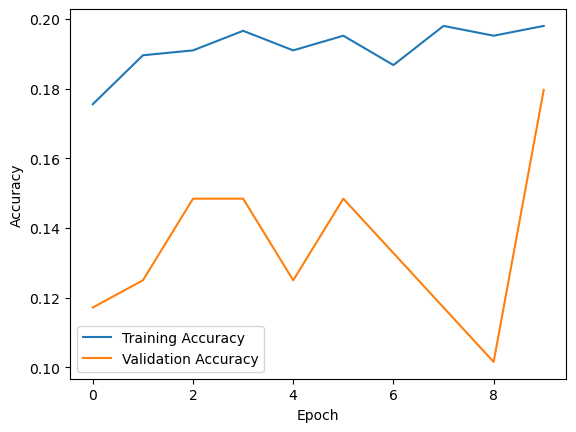

In [6]:
print("Training:", face_train.history['accuracy'][-1])
print("Validation:", face_train.history['val_accuracy'][-1])

plt.plot(face_train.history['accuracy'], label='Training Accuracy')
plt.plot(face_train.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Variance (Eyes & Eyebrows)

In [7]:
eyes_emotion_model = Sequential()

eyes_emotion_model.add(Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(30, 62, 1)))
eyes_emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

eyes_emotion_model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(14, 30, 6)))
eyes_emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

eyes_emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(6, 14, 16)))
eyes_emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

eyes_emotion_model.add(Flatten(name="eyes_flatten"))

eyes_emotion_model.add(Dense(1024, activation='relu'))
# eyes_emotion_model.add(Dropout(0.25))

eyes_emotion_model.add(Dense(7, activation='softmax'))

eyes_emotion_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

eyes_emotion_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 60, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 30, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 28, 16)        880       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 14, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 12, 32)         4640      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 6, 32)         

In [8]:
eyes_train = eyes_emotion_model.fit(
    eyes_train_generator,
    steps_per_epoch= 777 // 64,
    epochs=10,
    validation_data=eyes_valid_generator,
    validation_steps= 181 // 64  
)

Epoch 1/10
12/12 [==============================] - 1s 39ms/step - loss: 1.9398 - accuracy: 0.1680 - val_loss: 1.9469 - val_accuracy: 0.1406
Epoch 2/10
12/12 [==============================] - 0s 28ms/step - loss: 1.9312 - accuracy: 0.1921 - val_loss: 1.9572 - val_accuracy: 0.1250
Epoch 3/10
12/12 [==============================] - 0s 28ms/step - loss: 1.9260 - accuracy: 0.1935 - val_loss: 1.9742 - val_accuracy: 0.1016
Epoch 4/10
12/12 [==============================] - 0s 25ms/step - loss: 1.9194 - accuracy: 0.1978 - val_loss: 1.9616 - val_accuracy: 0.1172
Epoch 5/10
12/12 [==============================] - 0s 26ms/step - loss: 1.9197 - accuracy: 0.1893 - val_loss: 1.9677 - val_accuracy: 0.1250
Epoch 6/10
12/12 [==============================] - 0s 25ms/step - loss: 1.9158 - accuracy: 0.1921 - val_loss: 1.9668 - val_accuracy: 0.1250
Epoch 7/10
12/12 [==============================] - 0s 24ms/step - loss: 1.9135 - accuracy: 0.1935 - val_loss: 1.9646 - val_accuracy: 0.1797
Epoch 8/10
12

Plotting training and validation accuracy

Training: 0.19775596261024475
Validation: 0.125


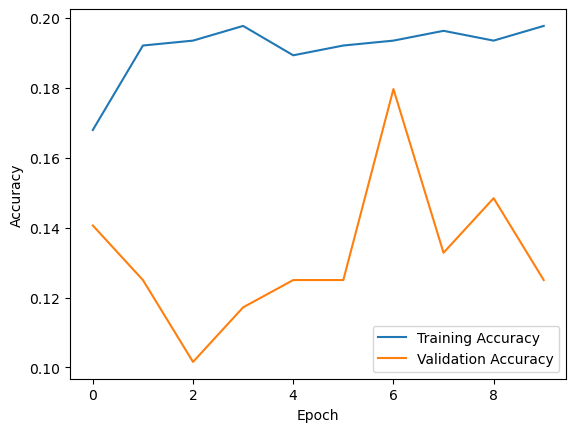

In [9]:
print("Training:", eyes_train.history['accuracy'][-1])
print("Validation:", eyes_train.history['val_accuracy'][-1])

plt.plot(eyes_train.history['accuracy'], label='Training Accuracy')
plt.plot(eyes_train.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Variance (Mouth)

In [10]:
mouth_emotion_model = Sequential()

mouth_emotion_model.add(Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(30, 38, 1)))
mouth_emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

mouth_emotion_model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(14, 18, 6)))
mouth_emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

mouth_emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(6, 8, 16)))
mouth_emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

mouth_emotion_model.add(Flatten(name="mouth_flatten"))

mouth_emotion_model.add(Dense(1024, activation='relu'))
# mouth_emotion_model.add(Dropout(0.25))

mouth_emotion_model.add(Dense(7, activation='softmax'))

mouth_emotion_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

mouth_emotion_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 36, 6)         60        
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 18, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 16, 16)        880       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 8, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 6, 32)          4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 3, 32)         

In [11]:
mouth_train = mouth_emotion_model.fit(
    mouth_train_generator,
    steps_per_epoch= 769 // 64,
    epochs=10,
    validation_data=mouth_valid_generator,
    validation_steps= 181 // 64  
)

Epoch 1/10
12/12 [==============================] - 1s 35ms/step - loss: 1.9466 - accuracy: 0.1277 - val_loss: 1.9440 - val_accuracy: 0.1406
Epoch 2/10
12/12 [==============================] - 0s 23ms/step - loss: 1.9364 - accuracy: 0.2326 - val_loss: 1.9432 - val_accuracy: 0.1406
Epoch 3/10
12/12 [==============================] - 0s 25ms/step - loss: 1.9331 - accuracy: 0.2454 - val_loss: 1.9417 - val_accuracy: 0.1484
Epoch 4/10
12/12 [==============================] - 0s 22ms/step - loss: 1.9290 - accuracy: 0.2525 - val_loss: 1.9353 - val_accuracy: 0.1875
Epoch 5/10
12/12 [==============================] - 0s 21ms/step - loss: 1.9241 - accuracy: 0.2681 - val_loss: 1.9364 - val_accuracy: 0.1797
Epoch 6/10
12/12 [==============================] - 0s 21ms/step - loss: 1.9235 - accuracy: 0.2468 - val_loss: 1.9367 - val_accuracy: 0.1875
Epoch 7/10
12/12 [==============================] - 0s 22ms/step - loss: 1.9179 - accuracy: 0.2667 - val_loss: 1.9572 - val_accuracy: 0.1641
Epoch 8/10
12

Plotting training and validation accuracy

Training: 0.29361701011657715
Validation: 0.1875


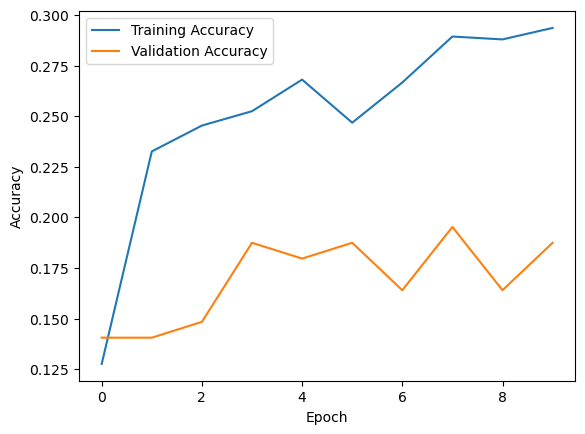

In [12]:
print("Training:", mouth_train.history['accuracy'][-1])
print("Validation:", mouth_train.history['val_accuracy'][-1])

plt.plot(mouth_train.history['accuracy'], label='Training Accuracy')
plt.plot(mouth_train.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Feature Extraction

Based on the journal that we will implement, now we need to get feature extraction from the flatten layer.

All the features obtained will be in the form of an array

In [13]:
flatten_face = face_emotion_model.get_layer('face_flatten').output
flatten_eyes = eyes_emotion_model.get_layer('eyes_flatten').output
flatten_mouth = mouth_emotion_model.get_layer('mouth_flatten').output

In [14]:
flatten_face

<KerasTensor: shape=(None, 288) dtype=float32 (created by layer 'face_flatten')>

In [15]:
flatten_eyes

<KerasTensor: shape=(None, 384) dtype=float32 (created by layer 'eyes_flatten')>

In [16]:
flatten_mouth

<KerasTensor: shape=(None, 192) dtype=float32 (created by layer 'mouth_flatten')>

# Concate The Feature and Make New Model

Merge all feature in `flatten layer`

In [17]:
concatenated_features = Concatenate(axis=-1)([flatten_face, flatten_eyes, flatten_mouth])

Now we want to reshape the `concatenated_features` into a **tensor** with shape (864, 1). This reshaping is often necessary to prepare the data for further processing.

In [18]:
# reshaped_features = Reshape((864, 1))(concatenated_features)

Adding dense layer, so the model can learn more complex representation

In [19]:
dense_layer = Dense(1024, activation='relu')(concatenated_features)

We will using dropout to prevent overfitting by reducing reliance on specific neurons.

In [20]:
drop = Dropout(0.25)(dense_layer)

Create layer for the final output with 7 units based on the class that we have

In [21]:
output_layer = Dense(7, activation='softmax')(concatenated_features)

Creates a Keras Model that takes the inputs from three different models
* face_emotion_model.input 
* eyes_emotion_model.input 
* mouth_emotion_model.input 

and outputs the result from the previously defined `output_layer`.

In [22]:
feature_fusion_model = Model(inputs=[face_emotion_model.input, eyes_emotion_model.input, mouth_emotion_model.input], outputs=output_layer)

In [23]:
feature_fusion_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001, decay=1e-5), metrics=['accuracy'])

Now we want to check if the model that we make is correct

In [24]:
feature_fusion_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 conv_1_input (InputLayer)   [(None, 38, 38, 1)]          0         []                            
                                                                                                  
 conv2d_input (InputLayer)   [(None, 30, 62, 1)]          0         []                            
                                                                                                  
 conv2d_3_input (InputLayer  [(None, 30, 38, 1)]          0         []                            
 )                                                                                                
                                                                                                  
 conv_1 (Conv2D)             (None, 36, 36, 6)            60        ['conv_1_input[0][0]']    

# Generating Combined Data for Feature Fusion Model

Create a generator function (`generate_combined_data`) intended for use in training a feature fusion model. The purpose of the generator is to create batches of combined input data, specifically for the face, eyes, and mouth, along with their corresponding output labels. The code ensures that all batches have an equal number of samples by determining the minimum number of samples among the three input sources. The face labels are then used as the `ground truth` for the combined model.

The generator is structured to be used within a training loop, providing a continuous flow of batches for training the feature fusion model effectively. This approach is essential when dealing with multiple input sources and maintaining consistency in the number of samples across these sources.

In [25]:
def generate_combined_data(face_generator, eyes_generator, mouth_generator):
    while True:
        face_data = face_generator.next()
        eyes_data = eyes_generator.next()
        mouth_data = mouth_generator.next()

        # Ensure all batches have the same number of samples
        min_samples = min(face_data[0].shape[0], eyes_data[0].shape[0], mouth_data[0].shape[0])
        combined_input = [face_data[0][:min_samples], eyes_data[0][:min_samples], mouth_data[0][:min_samples]]

        # Using face labels as ground truth for the combined model
        combined_output = face_data[1][:min_samples]  

        yield combined_input, combined_output

# Creating Combined Data Generators for Training and Validation

Now that we've got our awesome `generate_combined_data` function, let's put it to use for both `training` and `validation`. We're creating two special data generators: one for training (`combined_train_generator`) and another for validation (`combined_valid_generator`). These generators are all set to generate batches of combined input data, ensuring a harmonious blend of faces, eyes, and mouths for both training and validation phases.

In [26]:
combined_train_generator = generate_combined_data(face_train_generator, eyes_train_generator, mouth_train_generator)
combined_valid_generator = generate_combined_data(face_valid_generator, eyes_valid_generator, mouth_valid_generator)

# Train The  Model

Make parameters that are used (**optional**)  during the training of a model in Keras to define the number of batches to be drawn from the generator for one epoch and for one validation run, respectively.

In [27]:
steps_per_epoch = min(len(face_train_generator), len(eyes_train_generator), len(mouth_train_generator))
validation_steps = min(len(face_valid_generator), len(eyes_valid_generator), len(mouth_valid_generator))

In [28]:
print("Step per epochs: ", steps_per_epoch)
print("Validation steps: ", validation_steps)

Step per epochs:  13
Validation steps:  3


In [29]:
feature_fusion_train = feature_fusion_model.fit(
    combined_train_generator,
    steps_per_epoch=39,
    epochs=130,
    validation_data=combined_valid_generator,
    validation_steps=8
)

Epoch 1/130
39/39 [==============================] - 3s 63ms/step - loss: 1.9289 - accuracy: 0.1834 - val_loss: 1.9637 - val_accuracy: 0.1490
Epoch 2/130
39/39 [==============================] - 3s 68ms/step - loss: 1.9080 - accuracy: 0.2219 - val_loss: 1.9502 - val_accuracy: 0.1959
Epoch 3/130
39/39 [==============================] - 3s 69ms/step - loss: 1.8213 - accuracy: 0.3008 - val_loss: 1.9077 - val_accuracy: 0.1612
Epoch 4/130
39/39 [==============================] - 2s 61ms/step - loss: 1.6823 - accuracy: 0.3364 - val_loss: 1.8976 - val_accuracy: 0.2041
Epoch 5/130
39/39 [==============================] - 2s 62ms/step - loss: 1.5269 - accuracy: 0.4183 - val_loss: 1.9687 - val_accuracy: 0.2122
Epoch 6/130
39/39 [==============================] - 2s 61ms/step - loss: 1.4065 - accuracy: 0.4642 - val_loss: 1.8811 - val_accuracy: 0.2571
Epoch 7/130
39/39 [==============================] - 2s 61ms/step - loss: 1.3567 - accuracy: 0.4859 - val_loss: 1.9361 - val_accuracy: 0.2204
Epoch 

Plotting training and validation accuracy

Training: 0.9887299537658691
Validation: 0.3510203957557678


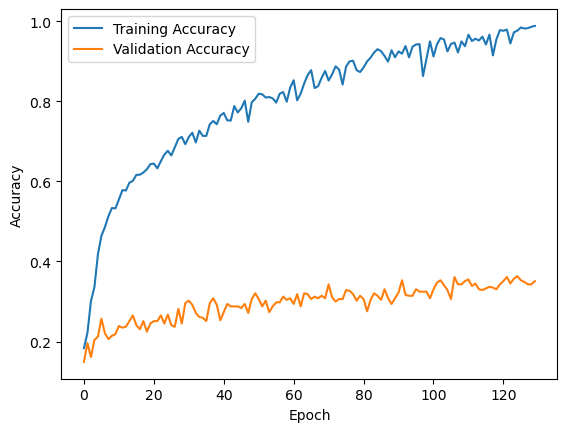

In [30]:
print("Training:", feature_fusion_train.history['accuracy'][-1])
print("Validation:", feature_fusion_train.history['val_accuracy'][-1])

plt.plot(feature_fusion_train.history['accuracy'], label='Training Accuracy')
plt.plot(feature_fusion_train.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save The Model & Weight

In [33]:
import os

model_folder = 'model'
if not os.path.exists(model_folder):
    os.makedirs(model_folder)

final_training_accuracy = feature_fusion_train.history['accuracy'][-1]

accuracy_percentage = round(final_training_accuracy * 100)

model_json = feature_fusion_model.to_json()
json_filename = f"{model_folder}/emotion_model_{accuracy_percentage}%.json"
with open(json_filename, "w") as json_file:
    json_file.write(model_json)

weights_filename = f"{model_folder}/emotion_model_{accuracy_percentage}%.h5"
feature_fusion_model.save_weights(weights_filename)